In [7]:
from collections import defaultdict
import csv
import numpy as np

POLICIES = [
    ("0", "1"),
    ("0", "0"),
    ("-2", "1"),
    ("-2", "0"),
    ("-1", "1"),
    ("-1", "0"),
]
LABELS = {
    ("0", "0"): "GCS, local",
    ("0", "1"): "GCS, remote",
    ("-2", "0"): "No FT, local",
    ("-2", "1"): "No FT, remote",
    ("-1", "0"): "Lineage stash, local",
    ("-1", "1"): "Lineage stash, remote",
}

def get_latencies(directory):
    all_latencies = {}
    for policy in POLICIES:
        all_latencies[policy] = defaultdict(lambda: defaultdict(list))
    with open('/home/stephanie/ray-fork/results/{}/min_latency.csv'.format(directory), 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            key = int(row['throughput'])
            policy = (row['gcs'], row['remote'])
            num_shards = int(row['num_shards'])
            if policy in all_latencies:
                latencies = all_latencies[policy][num_shards]
                latencies[key].append(float(row['min_latency']) * 1000 / 2)
    return all_latencies

num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76
num samples 76


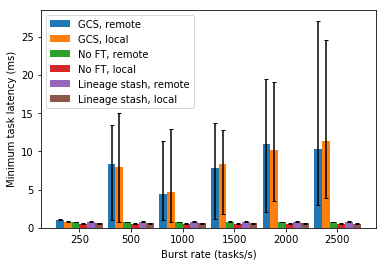

In [16]:
import matplotlib.pyplot as plt

DIRECTORY = "latencies-square"
WIDTH = 0.9 / len(POLICIES)
MAX_X = 4000

CAPACITIES = {
    1: 750,
    2: 0,
    4: 1250,
}

def plot_line(plt, results, label, num_shards, index=None):
    results = results[num_shards]
    ticks = np.array([x for x in sorted(results.keys()) if x <= MAX_X])
    means = []
    yerr_low = []
    yerr_high = []
    for tick in ticks:
        mean = np.mean(results[tick])
        print("num samples", len(results[tick]))
        means.append(mean)
        yerr_low.append(
            mean - np.quantile(results[tick], 0.025)
        )
        yerr_high.append(
            np.quantile(results[tick], 0.975) - mean
        )
    x = np.arange(len(ticks))
    plt.bar(x + index * WIDTH, means, yerr=[yerr_low, yerr_high], width=WIDTH, label=label, capsize=2)
#     ticks = ticks / CAPACITIES[1]
    plt.xticks(x + WIDTH * (len(POLICIES) - 1) / 2, ticks)

NUM_SHARDS = 4
all_latencies = get_latencies(DIRECTORY)
for i, policy in enumerate(POLICIES):
    plot_line(plt, all_latencies[policy], LABELS[policy], NUM_SHARDS, index=i)

plt.xlabel("Burst rate (tasks/s)")
plt.ylabel("Minimum task latency (ms)")
plt.legend()
# plt.show()

plt.savefig("/home/stephanie/ray-fork/results/{}/min_latency-{}-shards.pdf".format(DIRECTORY, NUM_SHARDS))